# Redes Neurais e Deep Learning 06

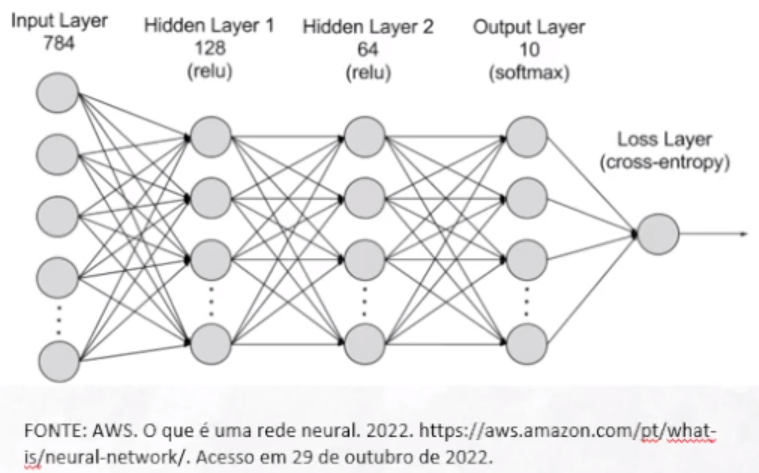

In [6]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\Ciências de Dados - Anhanguera Ampli\Inteligência Artificial\Redes Neurais e Deep Learning\RNA_Deep_Learning\Unidade_II\Aula_I\Rede_Neural.png')

# Exibir a imagem
imagem

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk

In [ ]:
tf.__version__

# Carregando a Base de Dados

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [ ]:
dataset = pd.read_csv("datasets/stroke.csv")

dataset

# Pré-processamento da base de dados

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

In [ ]:
dataset[dataset.isnull().any(axis=1)]

In [ ]:
#dataset[dataset.isnull().any(axis=1)] quantas linhas nulas?
dataset = dataset.dropna()

dataset

In [ ]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

x

In [ ]:
x.dtypes

In [ ]:
x['smoking_status'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['ever_married', 'Residence_type'] #unique pra descobrir quantos rótulos únicos
le = LabelEncoder()
x[cols] = x[cols].apply(le.fit_transform)

x.head(10)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

#https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['gender', 'work_type', 'smoking_status'])], 
                       remainder='passthrough')
x = ct.fit_transform(x)

x[0]

In [ ]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']
pd.DataFrame(x, columns=colunas)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

# Arquitetura de Rede Neural (MLP)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size=32, epochs=20)

# Resultados

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred) 
#vn, fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1), vp

cm

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
dataset['stroke'].value_counts()